In [1]:
! pip install segmentation_models
! pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.4 MB/s eta 0:00:0000:0100:01


In [1]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Model stuff
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import model_utility

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Segmentation Models: using `tf.keras` framework.


# What are we doing today?

In [2]:
model_path = "models/both_big_aug/"
type = "bothGB"
training_size = "1200"
epoch_num = "400"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

# Create training data

In [8]:
# X, Y = [], []

X, Y = model_utility.data_gather(X, Y, "light_spokes_training_images", "light_spokes_training_masks", aug_flag = 1, aug_num = 5)

Compose([
  GaussianBlur(always_apply=False, p=0.8, blur_limit=(11, 13), sigma_limit=(0, 0)),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)
1200 1200


In [9]:
X = normalize(np.array(X), axis=1)
Y = (np.array(Y))/255.

# train/test split test_size = .15 for light, .25 for dark(no agu)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

SIZE_Y, SIZE_X = X.shape[1], X.shape[2]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1020, 160, 736)
(180, 160, 736)
(1020, 160, 736)
(180, 160, 736)


In [11]:
model = model_utility.define_model(SIZE_Y, SIZE_X, backbone)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 160, 736, 1  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 160, 736, 1)  3           ['data[0][0]']                   
                                                                                                  
 zero_padding2d_34 (ZeroPadding  (None, 166, 742, 1)  0          ['bn_data[0][0]']                
 2D)                                                                                              
                                                                                            

In [12]:
history = model_utility.fit_model(x_train, y_train, model, model_path, batch_size = 10, epochs = int(epoch_num), validation_split = .13)

results = model.evaluate(x_test, y_test)

model_utility.save_model_history(model_path, model, history, results)

2023-08-22 15:35:48.186720: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 417812480 exceeds 10% of free system memory.
2023-08-22 15:35:49.526234: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 417812480 exceeds 10% of free system memory.
2023-08-22 15:35:50.143485: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 417812480 exceeds 10% of free system memory.
2023-08-22 15:35:50.597644: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 417812480 exceeds 10% of free system memory.


Epoch 1/400
89/89 [==============================] - ETA: 0s - loss: 0.1583 - iou_score: 0.0794
Epoch 1: val_iou_score improved from -inf to 0.00061, saving model to models/both_big_aug/bothGB_spoke_1200im_400e_resnet34.h5
89/89 [==============================] - 40s 309ms/step - loss: 0.1583 - iou_score: 0.0794 - val_loss: 0.3355 - val_iou_score: 6.0835e-04
Epoch 2/400
89/89 [==============================] - ETA: 0s - loss: 0.0520 - iou_score: 0.2289
Epoch 2: val_iou_score improved from 0.00061 to 0.00765, saving model to models/both_big_aug/bothGB_spoke_1200im_400e_resnet34.h5
89/89 [==============================] - 23s 264ms/step - loss: 0.0520 - iou_score: 0.2289 - val_loss: 0.1143 - val_iou_score: 0.0076
Epoch 3/400
89/89 [==============================] - ETA: 0s - loss: 0.0392 - iou_score: 0.3310
Epoch 3: val_iou_score improved from 0.00765 to 0.03138, saving model to models/both_big_aug/bothGB_spoke_1200im_400e_resnet34.h5
89/89 [==============================] - 24s 271ms/st

# Plots

Which model is this? - darkGB_Callback_shuffled_spoke_360im_300e_resnet34.json


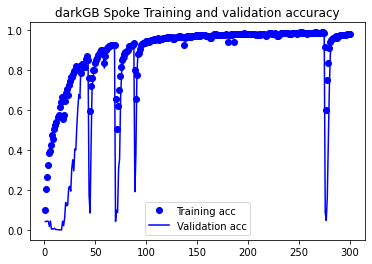

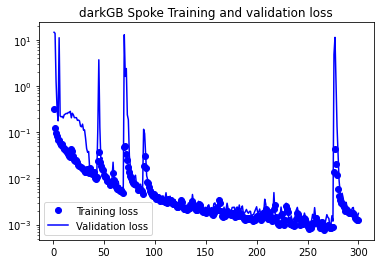

Last Train IOU Score:  0.9804413318634033
Last Train Loss Score:  0.001284320605918765
Last Validation IOU Score:  0.9749023914337158
Last Validation Loss Score:  0.0017555088270455599
darkGB_Callback_shuffled
360
300


In [ ]:
model_utility.display_results(model_path)
print(type)
print(training_size)
print(epoch_num)

In [3]:
model_path = "models/checkpoint/"
type = "darkGB_Callback_shuffled"
training_size = "360"
epoch_num = "300"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

In [4]:
from tensorflow import keras

model = keras.models.load_model(model_path, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

print(type)
print(training_size)
print(epoch_num)

darkGB_Callback_shuffled
360
300


# testing with images outside of train/test(light)

The spklfmovprocessed/ training set is made of 17 images
W1593676089.png 0


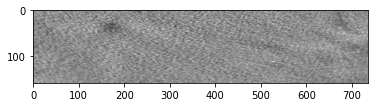

1/1 [==============================] - 5s 5s/step


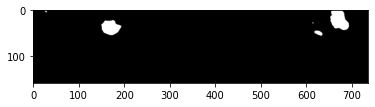

W1593678128.png 1


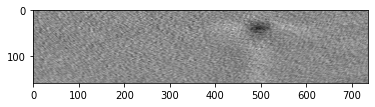

1/1 [==============================] - 0s 36ms/step


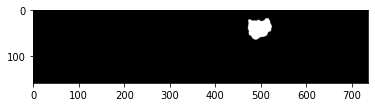

W1593680167.png 2


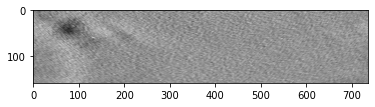

1/1 [==============================] - 0s 31ms/step


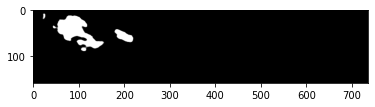

W1593682206.png 3


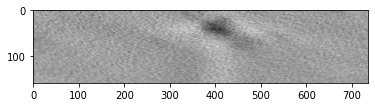

1/1 [==============================] - 0s 32ms/step


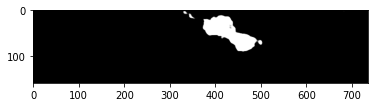

W1593684245.png 4


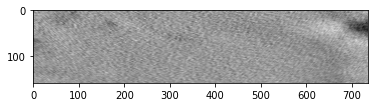

1/1 [==============================] - 0s 35ms/step


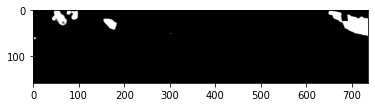

W1593686284.png 5


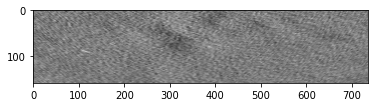

1/1 [==============================] - 0s 35ms/step


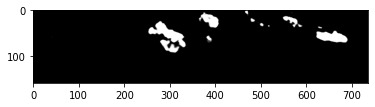

W1593688323.png 6


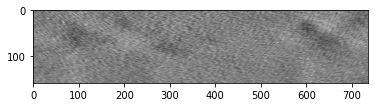

1/1 [==============================] - 0s 33ms/step


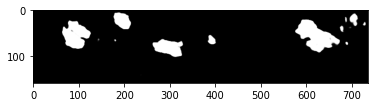

W1593690362.png 7


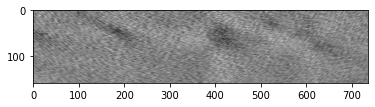

1/1 [==============================] - 0s 29ms/step


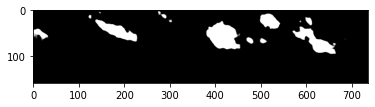

W1593692401.png 8


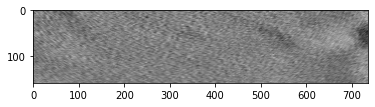

1/1 [==============================] - 0s 41ms/step


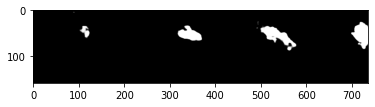

W1593694440.png 9


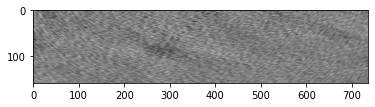

1/1 [==============================] - 0s 35ms/step


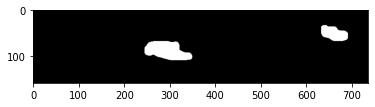

W1593696479.png 10


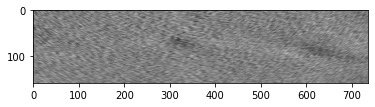

1/1 [==============================] - 0s 43ms/step


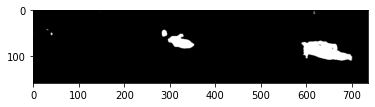

W1593698518.png 11


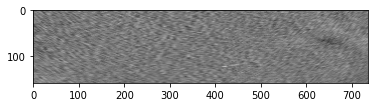

1/1 [==============================] - 0s 34ms/step


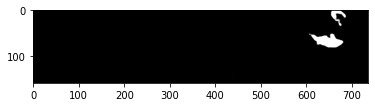

W1593700557.png 12


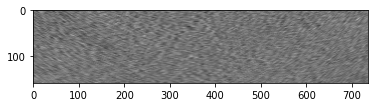

1/1 [==============================] - 0s 33ms/step


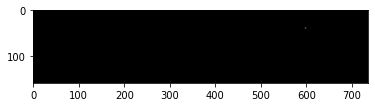

W1593702596.png 13


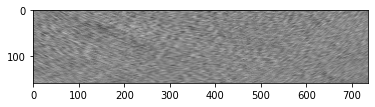

1/1 [==============================] - 0s 29ms/step


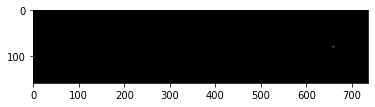

W1593704635.png 14


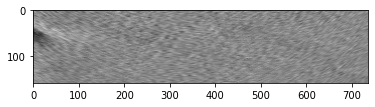

1/1 [==============================] - 0s 32ms/step


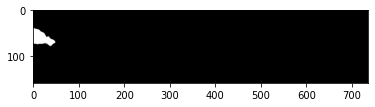

W1593706674.png 15


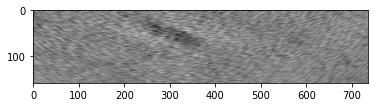

1/1 [==============================] - 0s 29ms/step


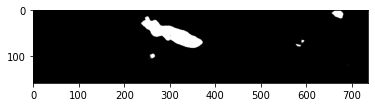

W1593708713.png 16


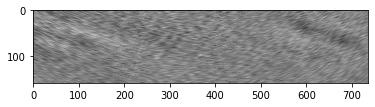

1/1 [==============================] - 0s 36ms/step


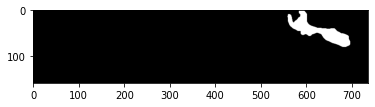

In [5]:
model_utility.model_testing(model, "spklfmovprocessed", 17)